In [21]:
using Plots
using Interact
using UnPack

gr() # activate GR backend
# plotlyjs() # activate plotly-js backend

Plots.GRBackend()

In [22]:
include("../Klimakoffer.jl/src/model.jl")

read_geography (generic function with 4 methods)

In [23]:
geography = read_geography("../Klimakoffer.jl/The_World.dat");
albedo = read_albedo("../Klimakoffer.jl/albedo.dat");
heat_capacities, tau_land, tau_snow, tau_sea_ice, tau_mixed_layer = calc_heat_capacities(geography,2.15);
diffusion = calc_diffusion_coefficients(geography);

CO2 = calc_CO2_concentration()
coalbedo = 1.0 .- albedo
solar_forcing = calc_solar_forcing(coalbedo,CO2);

outline = read_geography("../Klimakoffer.jl/The_World_Outline.dat");

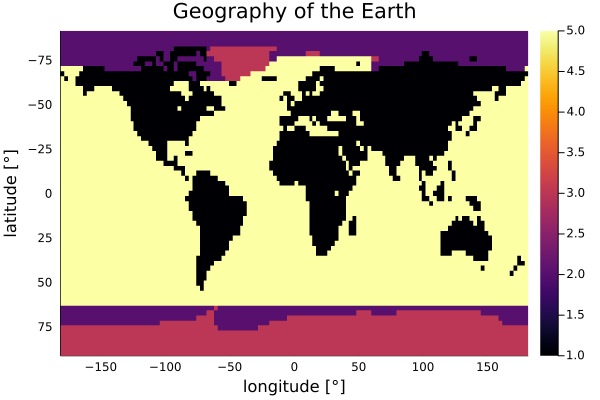

In [24]:
gr()

heatmap(LinRange(-180,180,128),LinRange(-90,90,65),transpose(geography),yflip=true,title="Geography of the Earth",xlabel="longitude [°]",ylabel="latitude [°]")
# savefig("geography.png")

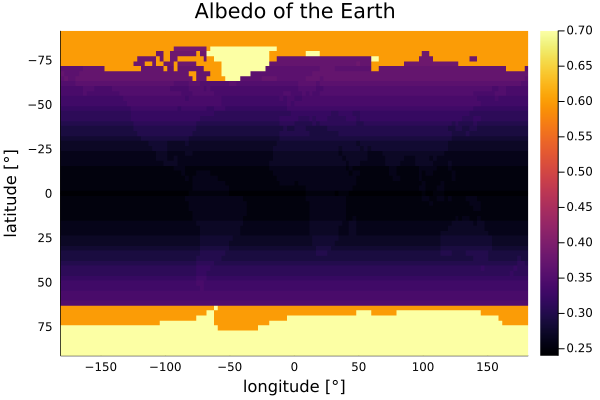

In [25]:
gr()

heatmap(LinRange(-180,180,128),LinRange(-90,90,65),transpose(albedo),yflip=true,title="Albedo of the Earth",xlabel="longitude [°]",ylabel="latitude [°]")
# savefig("albedo.png")

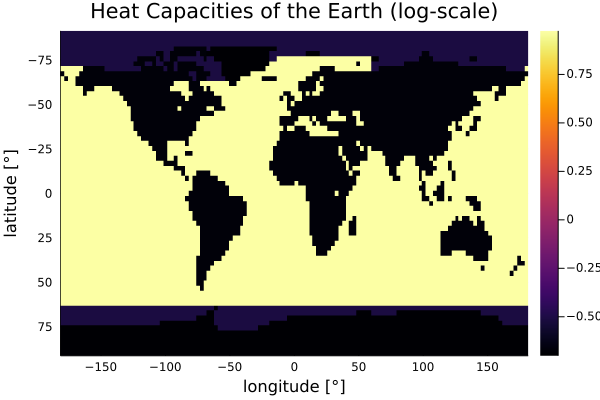

In [26]:
gr()

data = transpose(heat_capacities)
data = log10.(data)
heatmap(LinRange(-180,180,128),LinRange(-90,90,65),data,yflip=true,title="Heat Capacities of the Earth (log-scale)",xlabel="longitude [°]",ylabel="latitude [°]")
# savefig("heat_capacities.png")

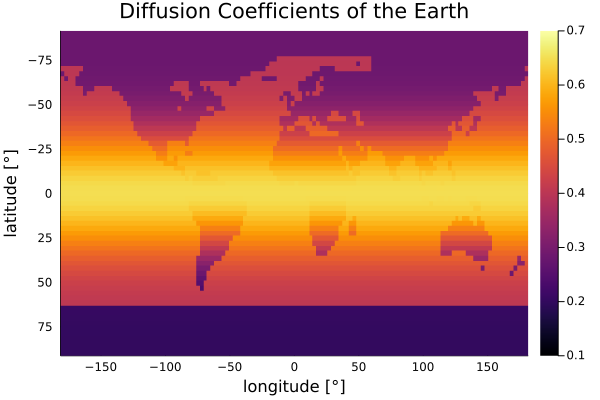

In [27]:
gr()

data = transpose(diffusion)
heatmap(LinRange(-180,180,128),LinRange(-90,90,65),data,
#     c = :berlin,
    clims=(0.1,0.7),
    yflip=true,
    title="Diffusion Coefficients of the Earth",
    xlabel="longitude [°]",ylabel="latitude [°]")
# savefig("diffusion.png")

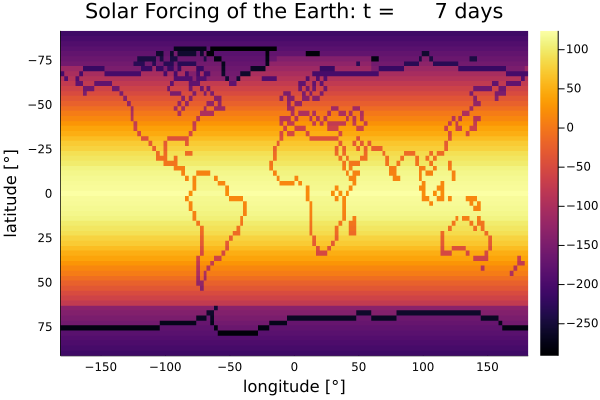

In [28]:
gr()

t = 1
title = "Solar Forcing of the Earth: t = " * lpad(string(Int(floor(t*365/48))), 6, ' ') * " days"

data = solar_forcing[:,:,t] - outline*100
data = transpose(data)
heatmap(LinRange(-180,180,128),LinRange(-90,90,65),data,
#     clims=(-200,150),
    yflip=true,
    title=title,
    xlabel="longitude [°]",ylabel="latitude [°]")

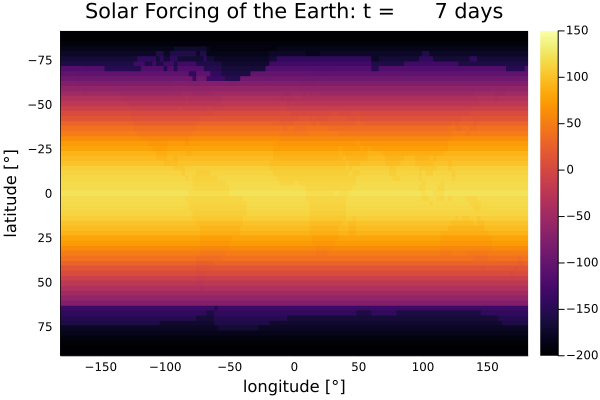

In [29]:
gr()

t = 1
title = "Solar Forcing of the Earth: t = " * lpad(string(Int(floor(t*365/48))), 6, ' ') * " days"

data = solar_forcing[:,:,t]
data = transpose(data)
heatmap(LinRange(-180,180,128),LinRange(-90,90,65),data,
    clims=(-200,150),
    yflip=true,
    title=title,
    xlabel="longitude [°]",ylabel="latitude [°]")

In [30]:
# @gif for t in 1:size(solar_forcing,3)
#     title = "Solar Forcing of the Earth: t = " * lpad(string(t), 3, ' ')
    
#     data = solar_forcing[:,:,t]
# #     data = transpose(data)
#     heatmap(LinRange(-180,180,128),LinRange(-90,90,65),data,
#         clims=(-200,150),
#         yflip=true,
#         title=title,
#         xlabel="longitude [°]",ylabel="latitude [°]")
    
# #     fpath = "png/solar_forcing/" * lpad(string(t), 3, '0') * ".png"
# #     println(fpath)
# #     savefig(fpath)
# end

┌ Info: Saved animation to 
│   fn = /mnt/western_digital/workbench/julia/Klimakoffer/sandbox/tmp.gif
└ @ Plots /home/jmark/.julia/packages/Plots/S30zV/src/animation.jl:114


Plots.AnimatedGif("/mnt/western_digital/workbench/julia/Klimakoffer/sandbox/tmp.gif")
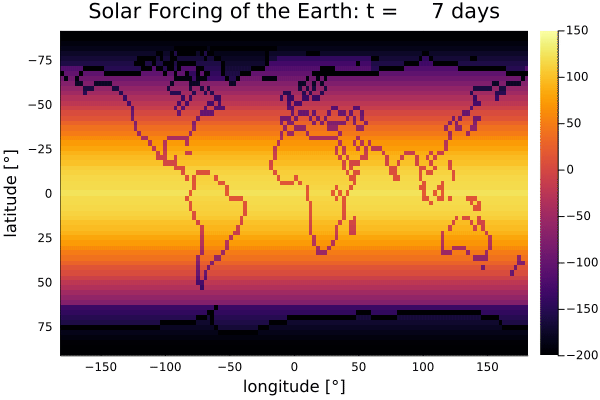

In [31]:
gr()

@gif for t in 1:size(solar_forcing,3)
    title = "Solar Forcing of the Earth: t = " * lpad(string(Int(floor(t*365/48))), 5, ' ') * " days"
    
    data = solar_forcing[:,:,t] - outline*100
    data = transpose(data)
    heatmap(LinRange(-180,180,128),LinRange(-90,90,65),data,
        clims=(-200,150),
        yflip=true,
        title=title,
        xlabel="longitude [°]",ylabel="latitude [°]")
    
#     fpath = "png/solar_forcing/" * lpad(string(t), 3, '0') * ".png"
#     println(fpath)
#     savefig(fpath)
end

In [36]:
gr()

@manipulate for t in 1:size(solar_forcing,3)
    title = "Solar Forcing of the Earth: t = " * lpad(string(Int(floor(t*365/48))), 5, ' ') * " days"
    
    data = solar_forcing[:,:,t] - outline*100
    data = transpose(data)
    heatmap(LinRange(-180,180,128),LinRange(-90,90,65),data,
        clims=(-200,150),
        yflip=true,
        title=title,
        xlabel="longitude [°]",ylabel="latitude [°]")
    
#     fpath = "png/solar_forcing/" * lpad(string(t), 3, '0') * ".png"
#     println(fpath)
#     savefig(fpath)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["t"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 48, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Int64} with 2 listeners. Value:
24, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/home/jmark/.julia/packages/Knockout/3gjS1/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/jmark/.julia/packages/Knockout/3gjS1/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/jmark/.julia/packages/InteractBase/Zfu5P/src/../assets/all.js"), Asset("css", nothing, "/home/jmark/.julia/packages/InteractBase/Zfu5P/src/../assets/style.css"), Asset("css", nothing, "/home/jmark/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007ff89fa34fd0, Task (runnable) @0x00007ff89fa34fd0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"37\",\"38\",\"39\",\"40\",\"41\",\"

In [33]:
plotlyjs()

data = geography
# data = transpose(data)

nx = size(data,1)
ny = size(data,2)

phi   = range(      0,stop=  2*pi,length=nx)
theta = range(-0.5*pi,stop=0.5*pi,length=ny)

x = sin.(phi') .* cos.(theta)
y = cos.(phi') .* cos.(theta)
z = ones(nx)' .* sin.(theta)

s = reverse(data')

s[1,1] = 0
s[end,end] = 6

surface(x, y, z, fill_z=s,title="Geography of the Earth",c=:coolwarm,size = (700, 700),legend = :none)

In [34]:
plotlyjs()

t = 24

title = "Solar Forcing of the Earth: t = " * lpad(string(Int(floor(t*365/48))), 6, ' ') * " days"

data = solar_forcing[:,:,t] - outline*500

nx = size(data,1)
ny = size(data,2)

phi   = range(      0,stop=  2*pi,length=nx)
theta = range(-0.5*pi,stop=0.5*pi,length=ny)

x = sin.(phi') .* cos.(theta)
y = cos.(phi') .* cos.(theta)
z = ones(nx)' .* sin.(theta)

s = reverse(data')

#     s[1,1] = -200
#     s[end,end] = 150

surface(x, y, z, fill_z=s,title=title,size = (700, 700),legend = :none)

In [35]:
# data = solar_forcing[:,:,1]

# nx = size(data,1)
# ny = size(data,2)

# phi   = range(      0,stop=  2*pi,length=nx)
# theta = range(-0.5*pi,stop=0.5*pi,length=ny)

# x = sin.(phi') .* cos.(theta)
# y = cos.(phi') .* cos.(theta)
# z = ones(nx)'  .* sin.(theta)

# @gif for t in 1:size(solar_forcing,3)
# # @gif for t in 1:3
#     title = "Solar Forcing of the Earth: t = " * lpad(string(Int(floor(t*365/48))), 6, ' ') * " days"
    
#     s = reverse(solar_forcing[:,:,t]')
    
#     s[1,1] = -200
#     s[end,end] = 150

#     surface(x, y, z,fill_z=s,title=title,clims=(-200,150),c=:coolwarm)
    
# end